In [118]:
import pandas as pd
import matplotlib.pyplot as plt

Problem a.

Text(0.5, 1.0, 'GDP per capita vs Life expectancy')

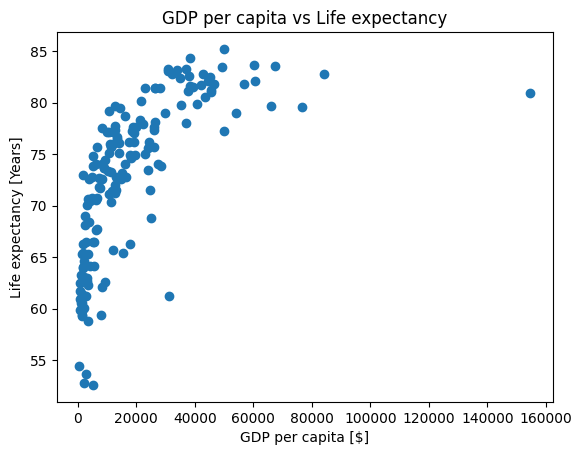

In [119]:
# Read and filter csv data to dataframes
le = pd.read_csv('life-expectancy.csv')
le = (le[le["Year"] == 2018])
le = le.drop(
    columns = ['Code', 'Year']
)
le = le.dropna()

gdp = pd.read_csv('gdp-per-capita-maddison-2020.csv')
gdp = (gdp[gdp["Year"] == 2017])
gdp = gdp.drop(
    columns = ['Code', 'Year', '417485-annotations']
)
gdp = gdp.dropna()

# Merge dataframes
le_gdp = pd.merge(le, gdp)

# Scatter plot data
plt.figure(1)
plt.scatter(le_gdp['GDP per capita'], le_gdp['Life expectancy at birth (historical)'])
plt.xlabel('GDP per capita [$]')
plt.ylabel('Life expectancy [Years]')
plt.title('GDP per capita vs Life expectancy')

Problem b.

In [120]:
# Calculate mean and STD of life expectancy
mean = le_gdp['Life expectancy at birth (historical)'].mean()
std = le_gdp['Life expectancy at birth (historical)'].std()

# Remove entry 'World' from dataframe
le_gdp = le_gdp[le_gdp.Entity != 'World']

# Filter data on values higher than one STD over mean
le_above_std = le_gdp[(le_gdp['Life expectancy at birth (historical)'] > (mean + std))]
le_above_std = le_above_std.sort_values(by='Life expectancy at birth (historical)', ascending=False)

print(le_above_std)

             Entity  Life expectancy at birth (historical)  GDP per capita
64   Hong Kong       85.2                                   49918.600     
75   Japan           84.3                                   38414.863     
142  Switzerland     83.6                                   60171.440     
134  Singapore       83.5                                   67331.030     
6    Australia       83.4                                   49265.613     
93   Malta           83.3                                   30901.930     
138  South Korea     83.3                                   37093.215     
73   Italy           83.2                                   34027.336     
139  Spain           83.1                                   30908.120     
112  Norway          82.8                                   84056.336     
66   Iceland         82.8                                   42978.234     
72   Israel          82.8                                   32339.092     
52   France          82.6

Problem c.

In [121]:
# Read GDP data and filter to dataframe
total_gdp = pd.read_csv('gross-domestic-product.csv')
total_gdp = (total_gdp[total_gdp['Year'] == 2018])
total_gdp = total_gdp.drop(columns=['Code', 'Year'])

# Merge GDP with life expectancy
le_tot_gdp = pd.merge(le, total_gdp)

# Remove entry 'World' from dataframe
le_tot_gdp = le_tot_gdp[le_tot_gdp.Entity != 'World']

# Calculate mean of GDP
gdp_mean = le_tot_gdp['GDP (constant 2015 US$)'].mean()

# Sort dataframe after GDP
le_tot_gdp = le_tot_gdp.sort_values(by='GDP (constant 2015 US$)', ascending=False)

# Filter data on GDP lower than mean
hi_le_lo_gdp = le_tot_gdp[(le_tot_gdp['GDP (constant 2015 US$)'] < (gdp_mean))]

# Filter data on life expectancy higher than one STD over mean
hi_le_lo_gdp = hi_le_lo_gdp[(hi_le_lo_gdp['Life expectancy at birth (historical)'] > (mean + std))]

print(hi_le_lo_gdp)


          Entity  Life expectancy at birth (historical)  GDP (constant 2015 US$)
86   Ireland      82.1                                   353404289024           
164  Singapore    83.5                                   344278302720           
88   Israel       82.8                                   340224147456           
79   Hong Kong    85.2                                   337417502720           
50   Denmark      81.0                                   327708278784           
62   Finland      81.6                                   251667480576           
147  Portugal     81.4                                   216552783872           
69   Greece       81.4                                   200141373440           
130  New Zealand  82.4                                   197515558912           
149  Qatar        80.9                                   166227181568           
106  Luxembourg   81.8                                   65173360640            
107  Macao        84.9      

Problem d.

In [122]:
# Load GDP data 
total_gdp = pd.read_csv('gross-domestic-product.csv')  

# Only include data from 2018
total_gdp = (total_gdp[total_gdp['Year'] == 2018])  

# Merge data for GDP and life expectancy
hi_gdp_lo_le = pd.merge(total_gdp, le) 

# Remove irrelevant columns and 'World' entry
hi_gdp_lo_le = hi_gdp_lo_le.drop(columns=['Code', 'Year'])
hi_gdp_lo_le = hi_gdp_lo_le[hi_gdp_lo_le.Entity != 'World']

# Calculate mean and standard deviation for GDP
gdp_mean = hi_gdp_lo_le['GDP (constant 2015 US$)'].mean()
gdp_std = hi_gdp_lo_le['GDP (constant 2015 US$)'].std()

# Filter GDP and life expectancy based on mean and standard deviation
hi_gdp_lo_le = hi_gdp_lo_le[(hi_gdp_lo_le['GDP (constant 2015 US$)'] > gdp_mean)]
hi_gdp_lo_le = hi_gdp_lo_le[(hi_gdp_lo_le['Life expectancy at birth (historical)'] < mean)]
hi_gdp_lo_le = hi_gdp_lo_le.sort_values(by='GDP (constant 2015 US$)', ascending=False)

print(hi_gdp_lo_le)

        Entity  GDP (constant 2015 US$)  Life expectancy at birth (historical)
82   India      2590898651136            70.7                                 
83   Indonesia  999178567680             70.3                                 
133  Nigeria    492074893312             52.6                                 


Problem e.

In [123]:

# Load GDP per capita data 
total_gdp = pd.read_csv('gdp-per-capita-maddison-2020.csv')  

# Only include data from 2018
total_gdp = (total_gdp[total_gdp['Year'] == 2018])  

# Merge data for GDP and life expectancy
hi_gdp_lo_le = pd.merge(total_gdp, le) 

# Remove irrelevant columns and 'World' entry
hi_gdp_lo_le = hi_gdp_lo_le.drop(columns=['Code', 'Year', '417485-annotations'])
hi_gdp_lo_le = hi_gdp_lo_le[hi_gdp_lo_le.Entity != 'World']

# Calculate mean and standard deviation for GDP
gdp_mean = hi_gdp_lo_le['GDP per capita'].mean()
gdp_std = hi_gdp_lo_le['GDP per capita'].std()

# Filter GDP and life expectancy based on mean and standard deviation
hi_gdp_lo_le = hi_gdp_lo_le[(hi_gdp_lo_le['GDP per capita'] > gdp_mean)]
hi_gdp_lo_le = hi_gdp_lo_le[(hi_gdp_lo_le['Life expectancy at birth (historical)'] < mean)]
hi_gdp_lo_le = hi_gdp_lo_le.sort_values(by='GDP per capita', ascending=False)

print(hi_gdp_lo_le)

                Entity  GDP per capita  Life expectancy at birth (historical)
47   Equatorial Guinea  28528.953       61.2                                 
152  Turkmenistan       26318.365       68.8                                 
77   Kazakhstan         25307.555       71.5                                 
